In [1]:
import os
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plt_show_gray(image):
    plt.imshow(image, cmap='gray')
    plt.show()

In [3]:
def plt_show_color(image):
    b, g, r = cv2.split(image)
    img = cv2.merge([r,g,b])
    plt.imshow(img)
    plt.show()

In [4]:
def color_position(image):
    colors = [
        # ([26, 43, 46], [34, 255, 255]),  # 黄色
        ([100, 43, 46], [124, 255, 255]),  # 蓝色
        # ([35, 43, 46], [77, 255, 255])   # 绿色
    ]
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    for (lower, upper) in colors:
        lower = np.array(lower, dtype="uint8")  # 颜色下限
        upper = np.array(upper, dtype="uint8")  # 颜色上限

        # 根据阈值找到相应的颜色
        mask = cv2.inRange(hsv, lowerb=lower, upperb=upper)
        output = cv2.bitwise_and(image, image, mask=mask)
        # cv2.imshow("image", img)
        # cv2.imshow("image_color", output)
        # cv2.waitKey(0)
    return output

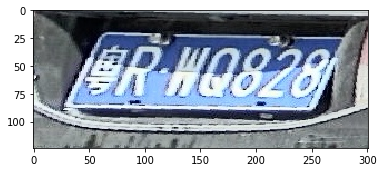

In [5]:
# src = cv2.imread('division_end/20180711/15313078707.jpg')
src = cv2.imread('wor2.jpg')
plt_show_color(src)

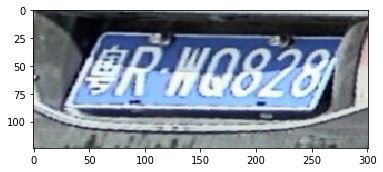

In [6]:
image = cv2.GaussianBlur(src, (3, 3), 0)
plt_show_color(image)

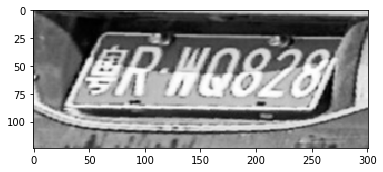

In [7]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt_show_gray(gray)

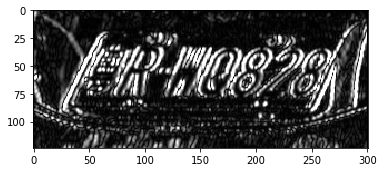

In [8]:
Sobel_x = cv2.Sobel(gray, cv2.CV_16S, 1, 0)
absX = cv2.convertScaleAbs(Sobel_x)
image = absX.copy()
plt_show_gray(image)

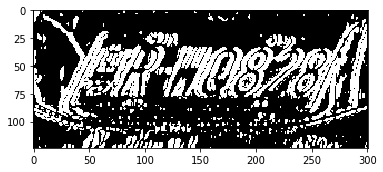

In [9]:
ret, binary = cv2.threshold(image, 50, 255, cv2.THRESH_BINARY)
plt_show_gray(binary)

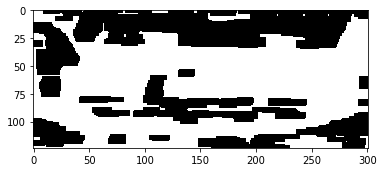

In [10]:
kernelX = cv2.getStructuringElement(cv2.MORPH_RECT, (15,5))
image = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernelX, 2)
plt_show_gray(image)

In [11]:
# kernelX = cv2.getStructuringElement(cv2.MORPH_RECT, (19, 1))
# kernelY = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 19))
# image = cv2.dilate(image, kernelX)
# image = cv2.erode(image, kernelX)

# image = cv2.erode(image, kernelY)
# iamge = cv2.dilate(image, kernelY)
# plt_show_gray(image)


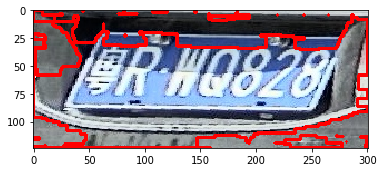

In [12]:
# 轮廓检测
# cv2.RETR_EXTERNAL表示只检测外轮廓
# cv2.CHAIN_APPROX_SIMPLE压缩水平方向，垂直方向，对角线方向的元素， 只保留该方向的终点坐标，
# 例如一个矩形轮廓只需要四个点来保存轮廓信息
contours, hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# 绘制轮廓
imagel = src.copy()
cv2.drawContours(imagel, contours, -1, (0, 0, 255), 2)
plt_show_color(imagel)

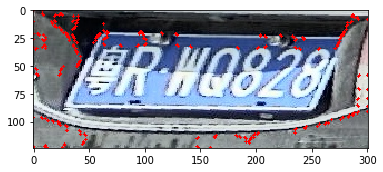

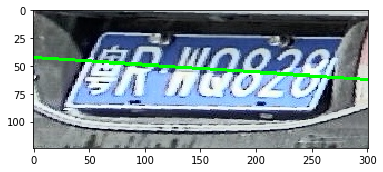

In [13]:
area= []
imagel = src.copy()
for j in range(len(contours)):
    area.append(cv2.contourArea(contours[j]))
max_idx = np.argmax(area)
cv2.drawContours(imagel, contours[max_idx], -1, (0, 0, 255), 2)
plt_show_color(imagel)
image3 = src.copy()
h, w = image3.shape[:2]

[vx, vy, x, y] = cv2.fitLine(contours[max_idx], cv2.DIST_L2, 0, 0.01, 0.01)
k = vy/vx
b = y-k*x

lefty = b
righty = k*w+b

img = cv2.line(image3, (w, righty), (0, lefty), (0, 255, 0), 2)
plt_show_color(img)

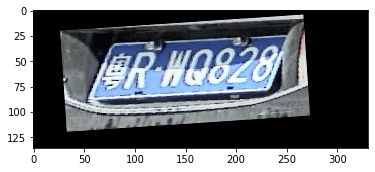

In [14]:
image4 = src.copy()
h, w = src.shape[:2]
a = math.atan(k)
a = math.degrees(a)
M = cv2.getRotationMatrix2D((w/2, h/2), a, 0.8)
dst = cv2.warpAffine(image4, M, (int(w*1.1), int(h*1.1)))
plt_show_color(dst)

In [15]:
cv2.imwrite("123.jpg", dst)

True